In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [0]:
prices_dataset =  pd.read_csv('./prices.csv', header=0)
prices_dataset

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [0]:
yahoo = prices_dataset[prices_dataset['symbol']=='YHOO']
yahoo_stock_prices = yahoo.close.values.astype('float32')
yahoo_stock_prices = yahoo_stock_prices.reshape(1762, 1)
yahoo_stock_prices.shape

(1762, 1)

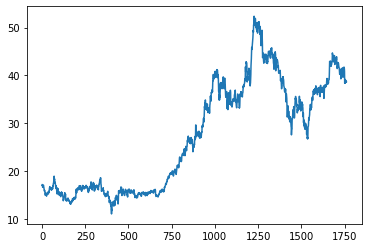

In [0]:
plt.plot(yahoo_stock_prices)
plt.show()

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
yahoo_stock_prices = scaler.fit_transform(yahoo_stock_prices)

In [0]:
train_size = int(len(yahoo_stock_prices) * 0.80)
test_size = len(yahoo_stock_prices) - train_size
train, test = yahoo_stock_prices[0:train_size,:], yahoo_stock_prices[train_size:len(yahoo_stock_prices),:]
print(len(train), len(test))

1409 353


In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
model = Sequential()

model.add(LSTM(
    input_dim=look_back,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='adam')
print ('compilation time : ', time.time() - start)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 4), units=50)`
  



compilation time :  0.023540019989013672


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  if sys.path[0] == '':


In [0]:
history = model.fit(trainX,trainY,batch_size=128,epochs = 300,validation_split=0.05)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1333 samples, validate on 71 samples
Epoch 1/300





1333/1333 [==============================] - 11s 8ms/step - loss: 0.1556 - val_loss: 0.3895
Epoch 2/300
1333/1333 [==============================] - 0s 77us/step - loss: 0.1020 - val_loss: 0.2199
Epoch 3/300
1333/1333 [==============================] - 0s 61us/step - loss: 0.0472 - val_loss: 0.0525
Epoch 4/300
1333/1333 [==============================] - 0s 62us/step - loss: 0.0200 - val_loss: 0.0011
Epoch 5/300
1333/1333 [==============================] - 0s 62us/step - loss: 0.0161 - val_loss: 0.0033
Epoch 6/300
1333/1333 [==============================] - 0s 74us/step - loss: 0.0100 - val_loss: 0.0082
Epoch 7/300
1333/1333 [==============================] - 0s 90us/step - loss: 0.0062 - val_loss: 0.0014
Epoch 8/300
1333/1333 [==============================] - 0s 82us/step - loss: 0.0038 - val_loss: 6.3383e-04
Epoch 9/300
1333

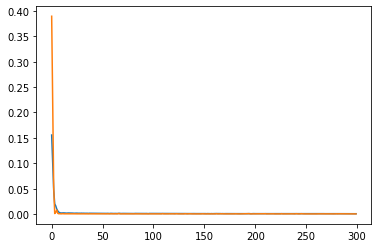

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

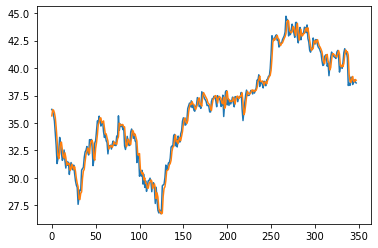

In [0]:
Xt = model.predict(testX)
plt.plot(scaler.inverse_transform(testY.reshape(-1,1)))
plt.plot(scaler.inverse_transform(Xt))

In [0]:
from sklearn.metrics import r2_score

r2_score(scaler.inverse_transform(testY.reshape(-1,1)),scaler.inverse_transform(Xt))

0.9743861649953541

In [0]:
lista = []

testX

array([[[0.6312985 , 0.6041666 , 0.5668605 , 0.60174423]],

       [[0.6041666 , 0.5668605 , 0.60174423, 0.60925394]],

       [[0.5668605 , 0.60174423, 0.60925394, 0.6058624 ]],

       ...,

       [[0.67999035, 0.6797481 , 0.66400194, 0.6678779 ]],

       [[0.6797481 , 0.66400194, 0.6678779 , 0.67417634]],

       [[0.66400194, 0.6678779 , 0.67417634, 0.66957366]]], dtype=float32)

In [0]:
a =np.reshape(testX[0],(1,1,testX[0].shape[1]))

for i in range(0,6):
  b = model.predict(a)
  a = a[0,0,0:(look_back-1)]
  a = np.append(a,b)
  a = np.reshape(a,(1,1,look_back))
  lista.append(b)

In [0]:
lista

[array([[0.5948806]], dtype=float32),
 array([[0.59042567]], dtype=float32),
 array([[0.587533]], dtype=float32),
 array([[0.5856542]], dtype=float32),
 array([[0.58443373]], dtype=float32),
 array([[0.5836408]], dtype=float32)]

In [0]:
r2_score([ i[0][0] for i in lista],scaler.inverse_transform(testY.reshape(-1,1))[0:6,0])

-78944246.693572

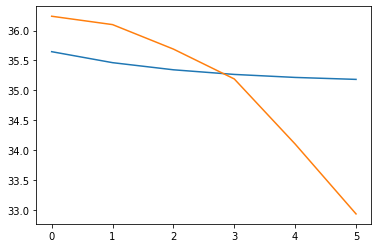

In [0]:
plt.plot(scaler.inverse_transform(np.array([ i[0][0] for i in lista]).reshape(-1,1)))
plt.plot(scaler.inverse_transform(testY.reshape(-1,1))[0:6,0])

In [0]:
def create_dataset_2(dataset, look_back,future_steps):
	dataX, dataY = [], []
	for i in range(len(dataset)-(look_back+future_steps)-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[(i + look_back):(i + look_back+future_steps), 0])
	return np.array(dataX), np.array(dataY)

In [0]:
look_back = 7
future_steps = 3
trainX, trainY = create_dataset_2(train, look_back,future_steps)
testX, testY = create_dataset_2(test, look_back,future_steps)

In [0]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
model = Sequential()

model.add(LSTM(
    input_dim=look_back,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=future_steps))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='adam')
print ('compilation time : ', time.time() - start)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 7), units=50)`
  


compilation time :  0.01870441436767578


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`
  if sys.path[0] == '':


In [0]:
history = model.fit(trainX,trainY,batch_size=128,epochs = 300,validation_split=0.05)

Train on 1328 samples, validate on 70 samples
Epoch 1/300
1328/1328 [==============================] - 1s 1ms/step - loss: 0.1604 - val_loss: 0.4242
Epoch 2/300
1328/1328 [==============================] - 0s 62us/step - loss: 0.1164 - val_loss: 0.2681
Epoch 3/300
1328/1328 [==============================] - 0s 73us/step - loss: 0.0570 - val_loss: 0.0740
Epoch 4/300
1328/1328 [==============================] - 0s 61us/step - loss: 0.0164 - val_loss: 0.0037
Epoch 5/300
1328/1328 [==============================] - 0s 65us/step - loss: 0.0129 - val_loss: 0.0018
Epoch 6/300
1328/1328 [==============================] - 0s 84us/step - loss: 0.0083 - val_loss: 0.0065
Epoch 7/300
1328/1328 [==============================] - 0s 83us/step - loss: 0.0060 - val_loss: 0.0012
Epoch 8/300
1328/1328 [==============================] - 0s 80us/step - loss: 0.0047 - val_loss: 9.2045e-04
Epoch 9/300
1328/1328 [==============================] - 0s 83us/step - loss: 0.0037 - val_loss: 0.0011
Epoch 10/300
13

In [0]:
from sklearn.metrics import r2_score
Xt = model.predict(testX)
r2_score(scaler.inverse_transform(testY),scaler.inverse_transform(Xt))